/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0119
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0013
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 9.8528e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0010
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 9.7399e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 6.6448e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 6.9524e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 5.7606e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 5.8596e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 7.5502e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Root Mean Squared Error (RMSE): 27.08


<ipython-input-1-0f7239a2074b>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


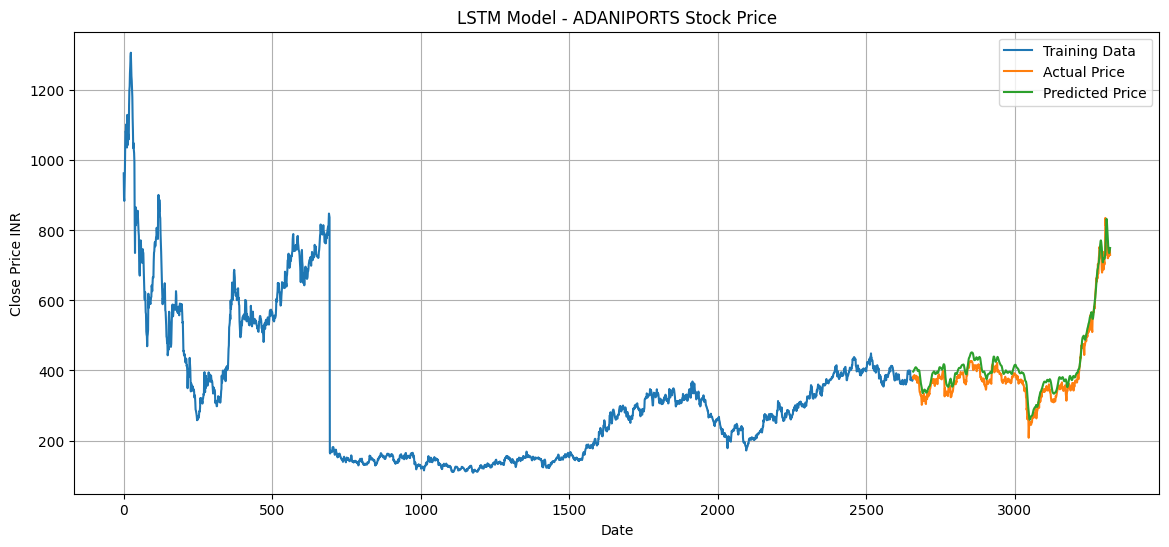

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

file_path = "/content/ADANIPORTS.csv"
df = pd.read_csv(file_path)

data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

training_data_len = int(np.ceil(len(dataset) * 0.8))
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=10)

test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14,6))
plt.title("LSTM Model - ADANIPORTS Stock Price")
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.legend()
plt.grid(True)
plt.savefig("ADANIPORTS_LSTM_Prediction.png")
plt.show()
